In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Q1. Load the data and Display structure,summary report.

In [89]:
iot= pd.read_csv(r"Z:\226524\Datasets\IOT-temp.csv")
iot

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [90]:
iot.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [91]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


# Q2. Check the attributes data types and Drop out unwanted columns like id , room_id.

In [92]:
iot.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [93]:
iot=iot.drop(['id','room_id/id'],axis=1)
iot

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


# Q3. Check for missing values in any of the columns. 

In [94]:
column_names = iot.columns
for column in column_names:
    print(column + ' - ' + str(iot[column].isnull().sum()))

noted_date - 0
temp - 0
out/in - 0


# Q4. Separate out date and time values of noted_date column

In [75]:
nd=iot['noted_date']
nd

0        08-12-2018 09:30
1        08-12-2018 09:30
2        08-12-2018 09:29
3        08-12-2018 09:29
4        08-12-2018 09:29
               ...       
97601    28-07-2018 07:07
97602    28-07-2018 07:07
97603    28-07-2018 07:06
97604    28-07-2018 07:06
97605    28-07-2018 07:06
Name: noted_date, Length: 97606, dtype: object

In [95]:
list_=[l.split() for l in list(nd)]
dates=[]
time=[]
for i in range(len(list_)):
    dates.append(list_[i][0])
    time.append(list_[i][1])
print(dates)
print(time)

['08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-12-2018', '08-1

In [96]:
iot=iot.drop(['noted_date'],axis=1)
iot

,temp,out/in
0,29,In
1,29,In
2,41,Out
3,41,Out
4,31,In
...,...,...
97601,31,In
97602,31,In
97603,31,In
97604,31,In


In [97]:
iot['date']=dates
iot['time']=time
iot

,temp,out/in,date,time
0,29,In,08-12-2018,09:30
1,29,In,08-12-2018,09:30
2,41,Out,08-12-2018,09:29
3,41,Out,08-12-2018,09:29
4,31,In,08-12-2018,09:29
...,...,...,...,...
97601,31,In,28-07-2018,07:07
97602,31,In,28-07-2018,07:07
97603,31,In,28-07-2018,07:06
97604,31,In,28-07-2018,07:06


# Q5. Further separate date,month,year from date and store as separate columns. Display the 	complete data with new columns.

In [98]:
iot['date']=pd.to_datetime(iot['date'])
iot['year']=iot['date'].dt.year
iot['month']=iot['date'].dt.month
iot['day']=iot['date'].dt.day
iot=iot.drop(['date'],axis=1)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-11-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-11-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-11-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-11-2018' in DD/MM/YYYY format. Provide format or specif

In [99]:
iot

,temp,out/in,time,year,month,day
0,29,In,09:30,2018,8,12
1,29,In,09:30,2018,8,12
2,41,Out,09:29,2018,8,12
3,41,Out,09:29,2018,8,12
4,31,In,09:29,2018,8,12
...,...,...,...,...,...,...
97601,31,In,07:07,2018,7,28
97602,31,In,07:07,2018,7,28
97603,31,In,07:06,2018,7,28
97604,31,In,07:06,2018,7,28


# Q6. Prepare boxplot of temperature.

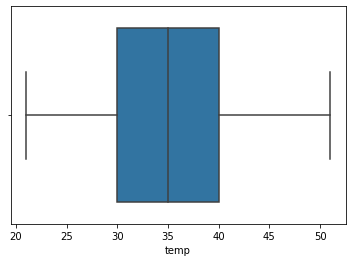

In [100]:
sns.boxplot(data=iot,x='temp');

# Q7. Prepare barplot for in/out vs temprature.

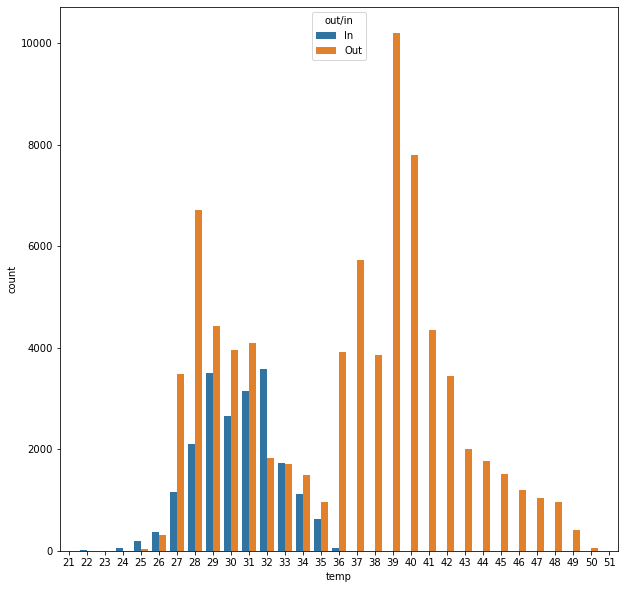

In [101]:
plt.figure(figsize=(10,10))
sns.countplot(data=iot,x='temp',hue='out/in');